TP2:
Deep learning : Fully connected layers
Members: 
Sarah Benabdallah - Ben Zinouba Mahdi - Mohamed Yassine Elkhadhiri
Summary :
In this notebook, we'll utilize Keras' fully connected layers to compare their performance on toy data to perceptron techniques, and then we'll use it on iris, digits, and faces datasets to study the limitations of these networks.

Install Librairies

In [2]:
!pip install tensorflow
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install keras 

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=df3d1f8c68ac7f94d7d6719f76c2a70105ea03440ecd655a30e98bea547d10fb
  Stored in directory: c:\users\sarah benabdallah\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


Import Librairies

In [4]:
from keras.models import Sequential
from sklearn.datasets import load_digits
from keras.utils import np_utils
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn import datasets

from keras.layers import Dense
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

EXP1: Toy Dataset

In [5]:
def generate_data(mu1, mu2, sigma1, sigma2, n, input_size):
  # the function generate_data constructs the dataset using standard deviation and mean values
  X1 = sigma1 * np.random.randn(n//2,input_size) + mu1
  X2 = sigma2 * np.random.randn(n//2,input_size) + mu2
  X =  np.concatenate((X1,X2))
  Y1 = -1*np.ones(n//2, dtype=int)
  Y2 = np.ones(n//2, dtype=int)
  y = np.concatenate((Y1,Y2))
  return X, y

In [6]:
def plot_dataset(input,target,title="Plot_dataset"):
  # function plot_dataset to plot 
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1], c=target, cmap="summer")
  legend = ax.legend(*scatter.legend_elements())
  plt.gca().set_ylim([-8, 8])
  ax.add_artist(legend)
  plt.title(title)
  plt.show()

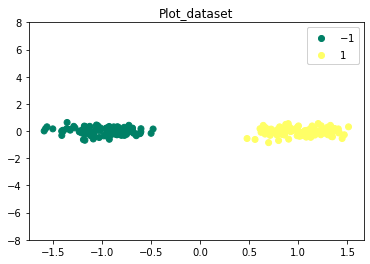

In [7]:
sigma1 = 0.25
sigma2 = 0.25
input_size = 2
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])

X,y = generate_data(mu1, mu2, sigma1, sigma2, 250 , input_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)
plot_dataset(X_train, y_train)

In [8]:
# model definition
model = Sequential([Dense(2, input_dim=2, activation='softmax'),])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [9]:
# labels to categories transformation
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [10]:
# model compilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model training
model.fit(X_train, y_train_cat, epochs=20, batch_size=4)
model.evaluate(X_test,y_test_cat)
print('Model acccuracy:',model.evaluate(X_test,y_test_cat)[1])

Epoch 1/20
50/50 [==============================] - 0s 941us/step - loss: 0.6968 - accuracy: 0.4900
Epoch 2/20
50/50 [==============================] - 0s 958us/step - loss: 0.6717 - accuracy: 0.6200
Epoch 3/20
50/50 [==============================] - 0s 878us/step - loss: 0.6474 - accuracy: 0.9600
Epoch 4/20
50/50 [==============================] - 0s 804us/step - loss: 0.6242 - accuracy: 1.0000
Epoch 5/20
50/50 [==============================] - 0s 837us/step - loss: 0.6019 - accuracy: 1.0000
Epoch 6/20
50/50 [==============================] - 0s 910us/step - loss: 0.5804 - accuracy: 1.0000
Epoch 7/20
50/50 [==============================] - 0s 739us/step - loss: 0.5598 - accuracy: 1.0000
Epoch 8/20
50/50 [==============================] - 0s 760us/step - loss: 0.5400 - accuracy: 1.0000
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 1.0000
Epoch 10/20
50/50 [==============================] - 0s 835us/step - loss: 0.5028 - accuracy: 1.0000
E

=> We can see that the model has reached 100% accuracy, which is to be expected given that the data is linearly separable.

EXP2: Iris Dataset

([], [])

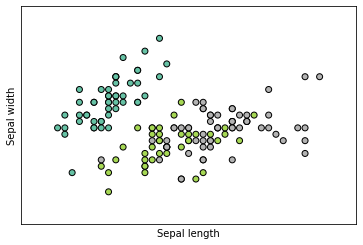

In [11]:
iris = datasets.load_iris()
# extracting the first two features.
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(6, 4))
plt.clf()

# Plotting the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [13]:
#precision = tp / (tp + fp) => The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#The recall = tp / (tp + fn) => The recall is intuitively the ability of the classifier to find all the positive samples
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall



def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def create_keras_model(input_dim, output_dim, nodes, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy', 
                               tf.keras.metrics.Precision(), 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.AUC()])
                      
        return model
    return create_model
# Creating multiple models
# Output dimension is 3 , so we have 3 classes to work with
models = [create_keras_model(X_train.shape[1], 3, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()
    


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)        

In [14]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_1
Test loss: 0.59505695104599
Test accuracy: 0.8666666746139526
Test precision: 0.8888888955116272
Test recall: 0.5333333611488342
Test f1_score: 0.949999988079071
Model name: model_2
Test loss: 0.5021652579307556
Test accuracy: 0.8666666746139526
Test precision: 0.8636363744735718
Test recall: 0.6333333253860474
Test f1_score: 0.9516667127609253
Model name: model_3
Test loss: 0.4247357249259949
Test accuracy: 0.8666666746139526
Test precision: 0.8666666746139526
Test recall: 0.8666666746139526
Test f1_score: 0.9461110830307007
Model name: model_4
Test loss: 0.43926724791526794
Test accuracy: 0.800000011920929
Test precision: 0.800000011920929
Test recall: 0.800000011920929
Test f1_score: 0.9488888382911682


EXP 3: Digits Dataset

<Figure size 432x288 with 0 Axes>

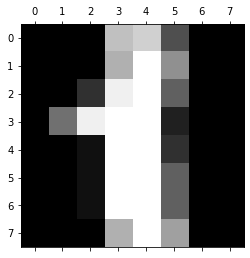

In [15]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [16]:
yDigit = digits.target
x_digits = digits.images.reshape((len(digits.images), -1))
print(x_digits.shape)
print(yDigit.shape)


(1797, 64)
(1797,)


In [17]:
y_digits = np_utils.to_categorical(digits.target,10)
train_img, test_img, train_label, test_label = train_test_split(x_digits, y_digits, test_size=0.2, random_state=0)
def plot_sample(X, y, index):
    plt.imshow(X[index])        
    plt.xlabel(y[index])
print(train_img.shape)
print(train_label.shape)

(1437, 64)
(1437, 10)


In [18]:
# Creating multiple models
# Output dimension is 10 , we have 10 classes to work with
models = [create_keras_model(train_img.shape[1], 10, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 6)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                650       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                650       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)     

In [19]:
for created_model in models:
    model = created_model()
    print('Model_name:', model.name)
    callback = model.fit(train_img, train_label,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(test_img, test_label, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model_name: model_1
Test loss: 0.30385860800743103
Test accuracy: 0.949999988079071
Test precision: 0.949999988079071
Test recall: 0.949999988079071
Test f1_score: 0.9876440763473511
Model_name: model_2
Test loss: 0.28308260440826416
Test accuracy: 0.9444444179534912
Test precision: 0.9444444179534912
Test recall: 0.9444444179534912
Test f1_score: 0.9904252290725708
Model_name: model_3
Test loss: 0.328421413898468
Test accuracy: 0.9694444537162781
Test precision: 0.9693593382835388
Test recall: 0.9666666388511658
Test f1_score: 0.98805171251297
Model_name: model_4
Test loss: 0.50824373960495
Test accuracy: 0.9388889074325562
Test precision: 0.941504180431366
Test recall: 0.9388889074325562
Test f1_score: 0.9772235751152039
Model_name: model_5
Test loss: 0.5531978011131287
Test accuracy: 0.9388889074325562
Test precision: 0.9388889074325562
Test recall: 0.9388889074325562
Test f1_score: 0.9826861619949341
